In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import boto3

In [91]:
#df = pd.read_csv("C:\\Users\\moksh\\Downloads\\archive (1)\\card_transdata.csv")

# created a bucket named "damg-project" with "card_transdata.csv" file in it

bucket = "damg-project"
file_name = "card_transdata.csv"


s3 = boto3.client('s3') 
# 's3' is a key word. create connection to S3 using default config and all buckets within S3

obj = s3.get_object(Bucket= bucket, Key= file_name) 
# get object and file (key) from bucket

initial_df = pd.read_csv(obj['Body']) # 'Body' is a key word

In [92]:
print(initial_df.head)
print(" Shape of the dataset: ", initial_df.shape)

<bound method NDFrame.head of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2              

In [93]:
df2 = initial_df.copy()

In [95]:
print("Dataframe shape:", df2.shape)
df2

Dataframe shape: (1000000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [97]:
df2.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [98]:
df2.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [99]:
df2_log = df2.copy()

for column in [0, 1, 2]:
    df2_log.iloc[:, column] = np.log10(df2.iloc[:, column])

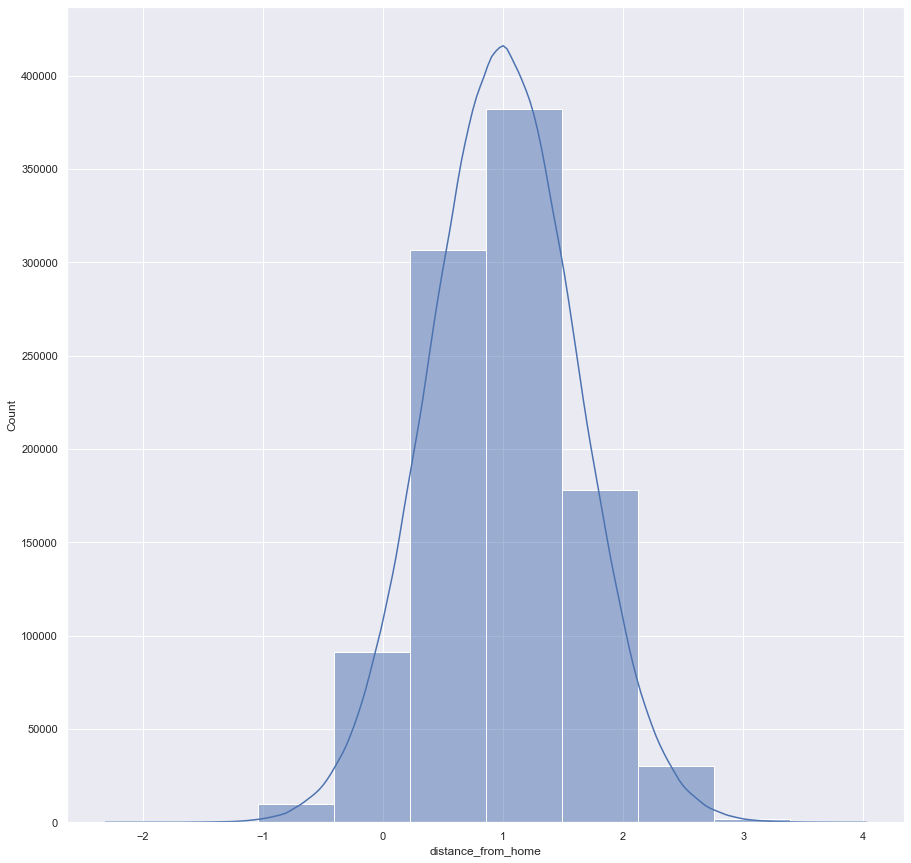

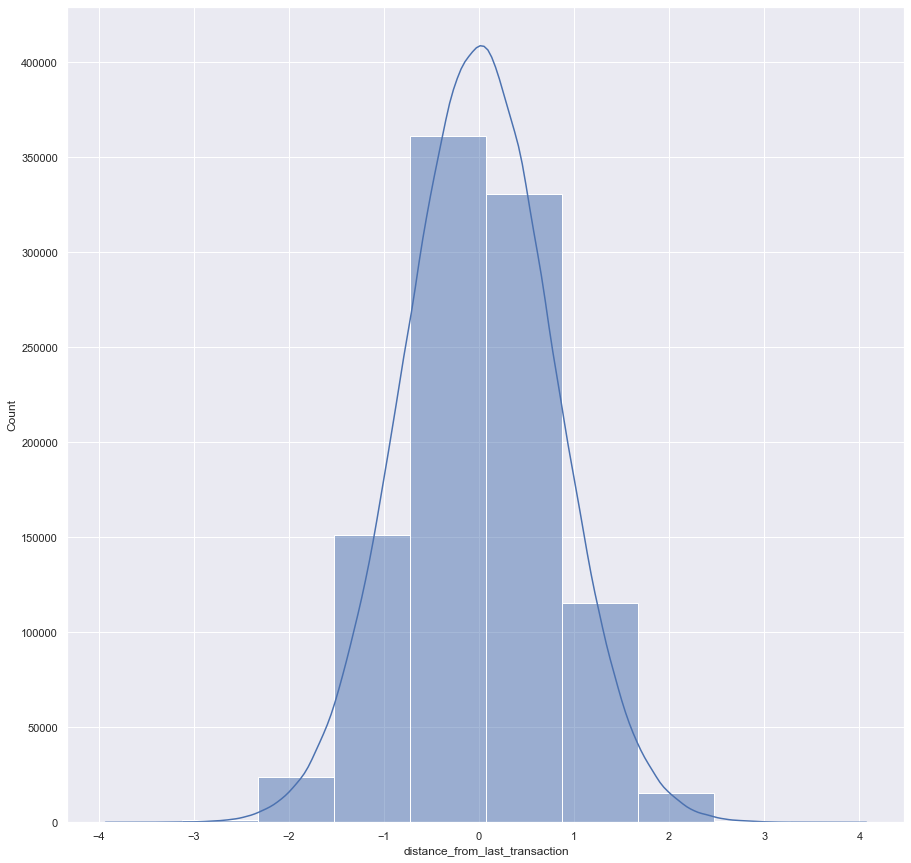

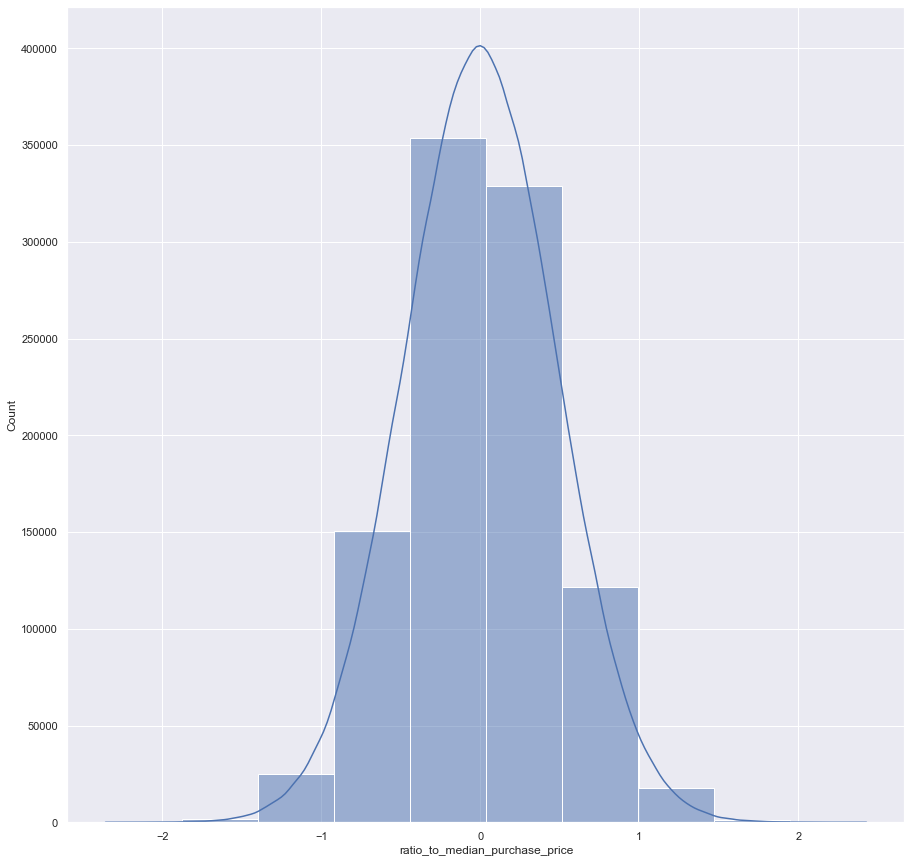

In [100]:
numerical_columns = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in numerical_columns:
    plt.figure()
    plot = df2_log[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [101]:
for column in numerical_columns:
    if len(df2[df2[column] < 0]) == 0:
        print(column, "has no negative values.")
    else:
        print(column, "has negative values.")

distance_from_home has no negative values.
distance_from_last_transaction has no negative values.
ratio_to_median_purchase_price has no negative values.


In [102]:
df2.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
#Number of fraud transactions
df2[df2["fraud"] == 1].fraud.count()

87403

In [104]:
f_count = df2[df2["fraud"] == 1]["fraud"].count()
nf_count = df2[df2["fraud"] == 0]["fraud"].count()
print("Number of fraud transactions:", f_count)
print("Number of non-fraud transactions:", nf_count)
print("Fraud percent:", f_count / (f_count + nf_count) * 100)

Number of fraud transactions: 87403
Number of non-fraud transactions: 912597
Fraud percent: 8.7403


<BarContainer object of 1 artists>

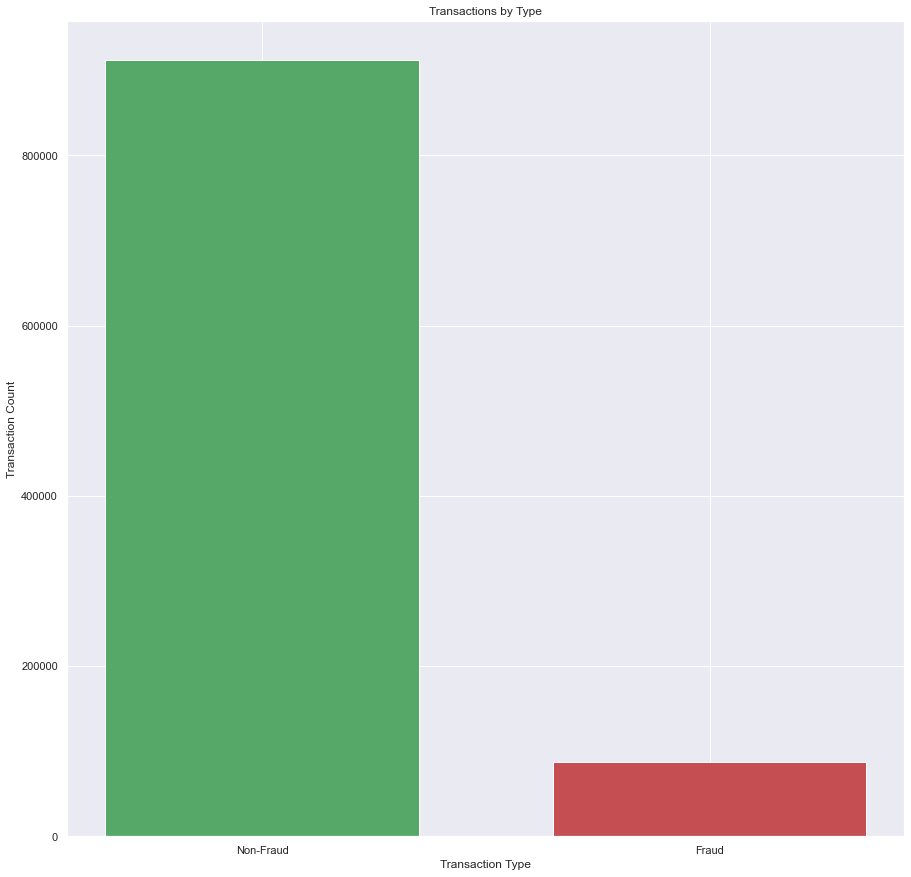

In [105]:
categories = ["Non-Fraud", "Fraud"]
xpos = np.array([0, 1])
plt.xticks(xpos, categories)
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Count")
plt.title("Transactions by Type")
plt.bar(xpos[0], nf_count, width= 0.7, color = "g")
plt.bar(xpos[1], f_count, width = 0.7, color="r")

([<matplotlib.patches.Wedge at 0x2004d4449a0>,
 [Text(-1.058791700494653, 0.29826185636725505, 'Non-Fraud'),
  Text(1.1550454914487123, -0.3253765705824602, 'Fraud')],
 [Text(-0.5775227457243561, 0.16268828529123003, '91.26%'),
  Text(0.6737765366784155, -0.1898029995064351, '8.74%')])

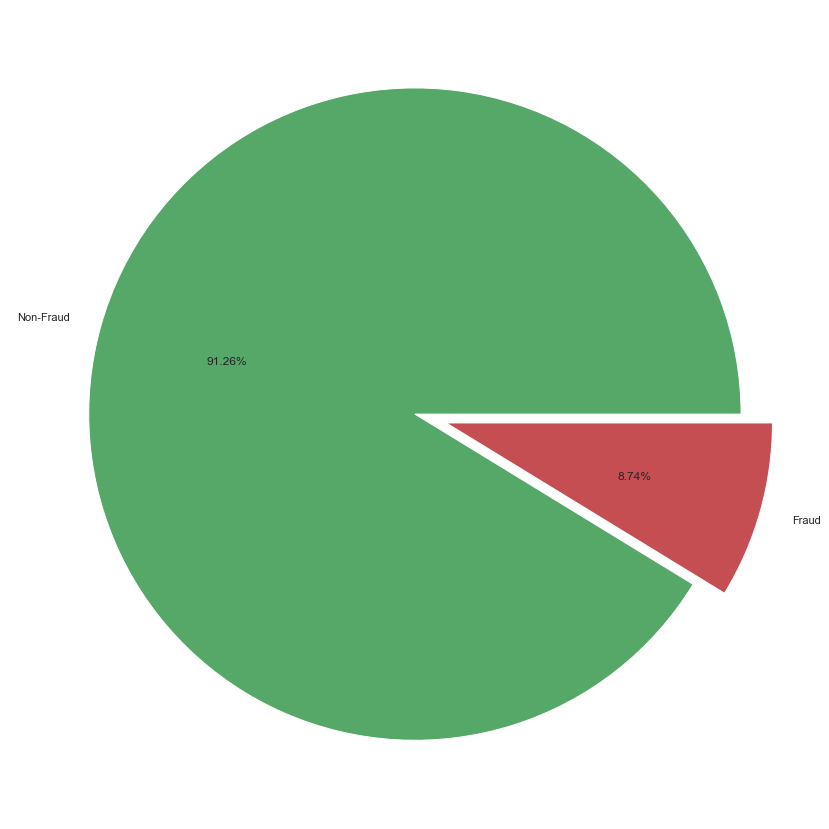

In [106]:
plt.pie(df2["fraud"].value_counts(), labels = categories, autopct = "%.2f%%", explode= (0, 0.1), colors = ("g", "r"))

In [107]:
fraud_df = df2[df2["fraud"] == 1]
fraud_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


<AxesSubplot:xlabel='online_order', ylabel='count'>

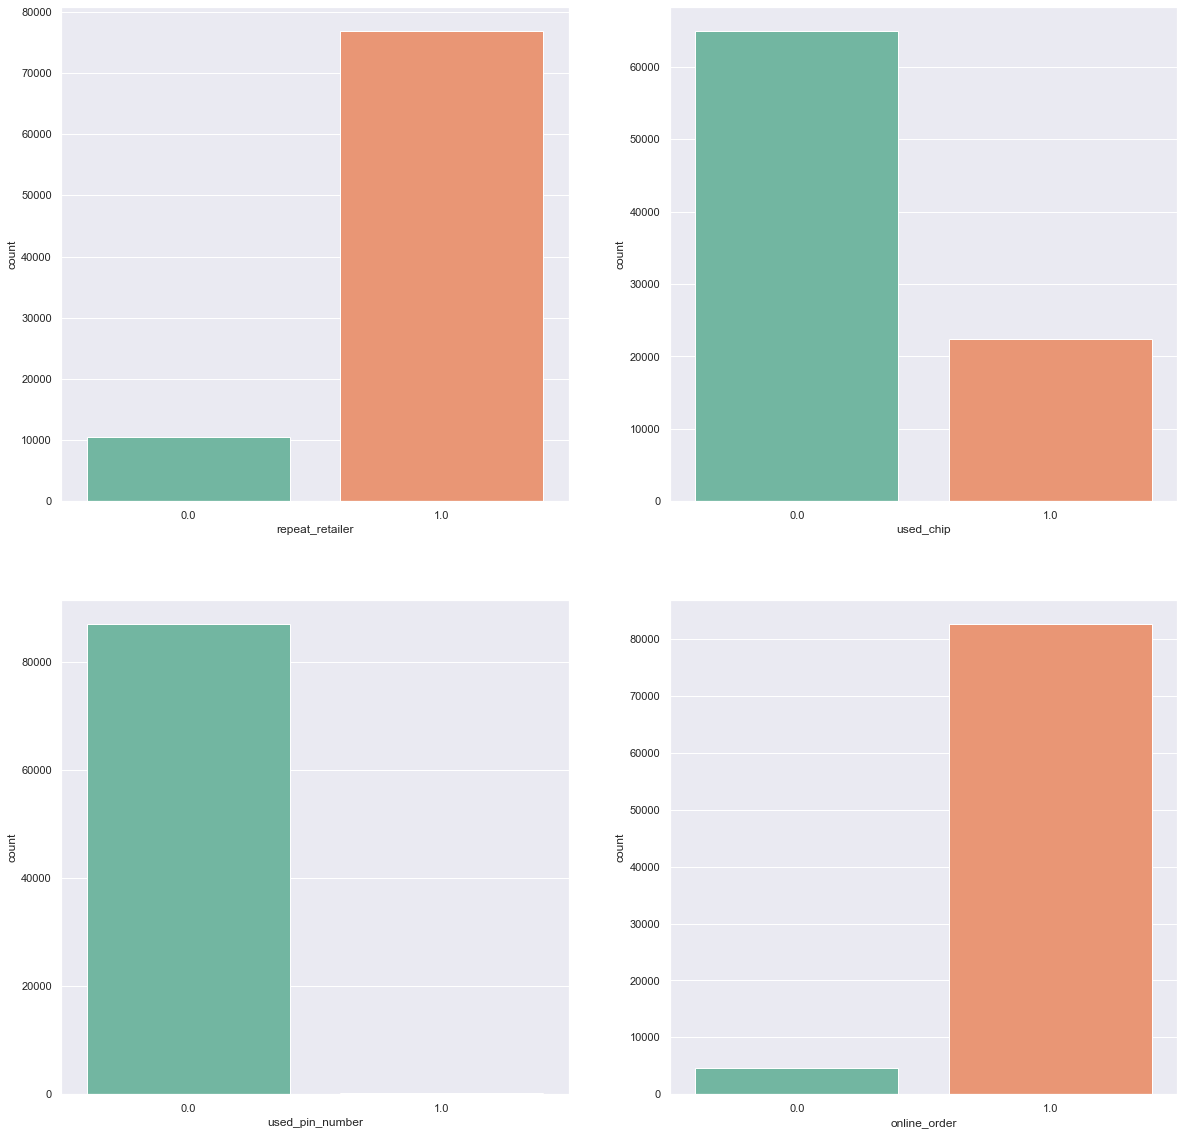

In [108]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Set2", data = fraud_df)

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Set2", data = fraud_df)

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Set2", data = fraud_df)

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Set2", data = fraud_df)

Text(0.5, 1.0, 'Was the transaction online?')

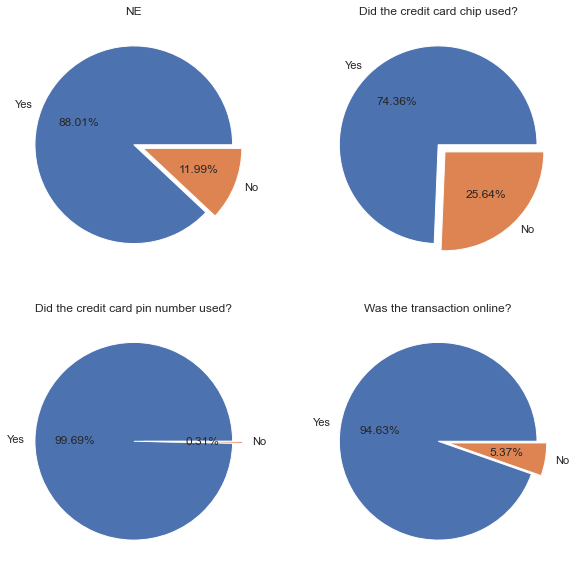

In [109]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.pie(fraud_df["repeat_retailer"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("NE")

plt.subplot(2,2,2)
plt.pie(fraud_df["used_chip"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Did the credit card chip used?")

plt.subplot(2,2,3)
plt.pie(fraud_df["used_pin_number"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Did the credit card pin number used?")

plt.subplot(2,2,4)
plt.pie(fraud_df["online_order"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1))
plt.title("Was the transaction online?")

<AxesSubplot:xlabel='ratio_to_median_purchase_price', ylabel='fraud'>

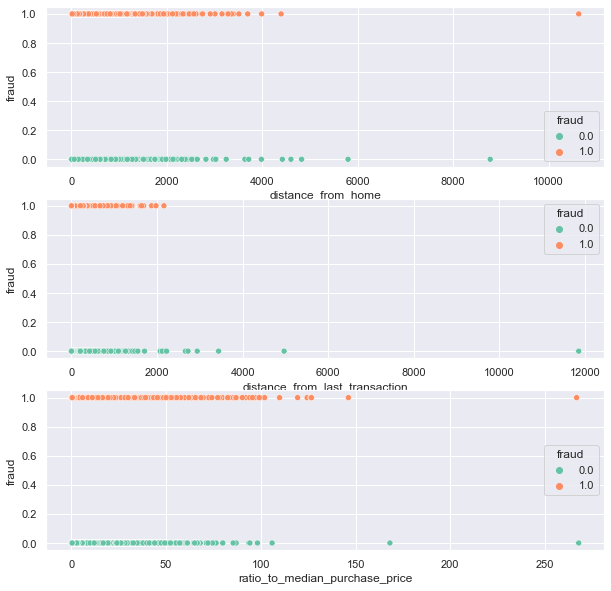

In [110]:
plt.figure(figsize = (10,10))

plt.subplot(3,1,1)
sns.scatterplot(y = "fraud", x = "distance_from_home", palette = "Set2", data = df2, hue = "fraud")

plt.subplot(3,1,2)
sns.scatterplot(y = "fraud", x = "distance_from_last_transaction", palette = "Set2", data = df2, hue = "fraud")

plt.subplot(3,1,3)
sns.scatterplot(y = "fraud", x = "ratio_to_median_purchase_price", palette = "Set2", data = df2, hue = "fraud")

### OverSampling Using SMOTE technique

In [111]:
#Splitting the features and target
x = df2.drop("fraud", axis = 1).values
y = df2["fraud"].values

In [112]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=39)
non_fraud_over, fraud_over = smote.fit_resample(x, y)

In [113]:
non_fraud_over_df = pd.DataFrame(non_fraud_over, columns=["distance_from_home", "distance_from_last_transaction",
       "ratio_to_median_purchase_price", "repeat_retailer", "used_chip",
       "used_pin_number", "online_order"])
non_fraud_over_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.000000,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.000000,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.000000,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.000000,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.000000,0.0,1.0
...,...,...,...,...,...,...,...
1825189,0.865098,1.341068,4.173964,0.0,1.000000,0.0,1.0
1825190,4.803252,0.744443,6.650998,1.0,1.000000,0.0,1.0
1825191,12.536102,119.006991,4.094842,1.0,0.835731,0.0,1.0
1825192,389.245617,3.480952,0.922567,1.0,0.000000,0.0,1.0


In [114]:
non_fraud_over_df["fraud"] = fraud_over
df3 = non_fraud_over_df

In [115]:
print("df3 shape:", df3.shape)
print(df3.info())
df3.describe()

df3 shape: (1825194, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825194 entries, 0 to 1825193
Data columns (total 8 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   distance_from_home              float64
 1   distance_from_last_transaction  float64
 2   ratio_to_median_purchase_price  float64
 3   repeat_retailer                 float64
 4   used_chip                       float64
 5   used_pin_number                 float64
 6   online_order                    float64
 7   fraud                           float64
dtypes: float64(8)
memory usage: 111.4 MB
None


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1825194.0
mean,4.442516e+01,8.458492e+00,3.694127e+00,8.809996e-01,3.055032e-01,5.625144e-02,7.852103e-01,0.5
std,1.018351e+02,3.750252e+01,4.693421e+00,3.232951e-01,4.555445e-01,2.296677e-01,4.080603e-01,0.5
min,4.874385e-03,1.182816e-04,4.399240e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,4.142911e+00,3.112290e-01,6.944836e-01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
50%,1.173429e+01,1.050549e+00,1.993814e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.5
75%,3.774807e+01,3.800466e+00,5.212519e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.0
max,1.063272e+04,1.185110e+04,2.678029e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0


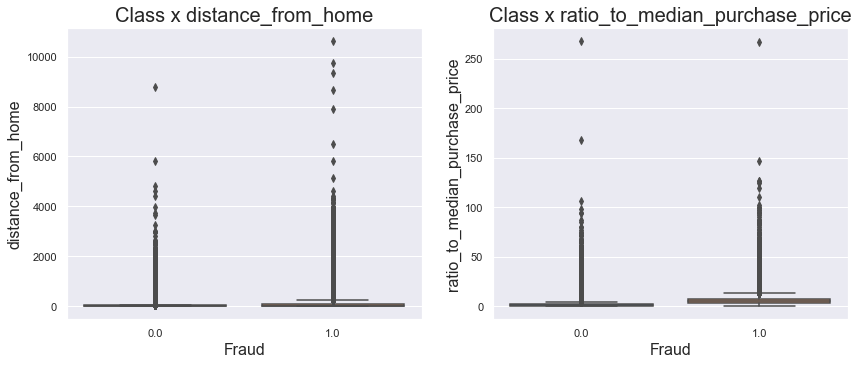

In [116]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="fraud",y="distance_from_home",
                 data=df3)
ax.set_title("Class x distance_from_home", fontsize=20)
ax.set_xlabel("Fraud", fontsize=16)
ax.set_ylabel("distance_from_home", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="fraud",y="ratio_to_median_purchase_price", data=df_credit)
ax1.set_title("Class x ratio_to_median_purchase_price", fontsize=20)
ax1.set_xlabel("Fraud", fontsize=16)
ax1.set_ylabel("ratio_to_median_purchase_price", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [117]:
#Correlation
df3.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.017345,-0.083492,0.156579,-0.107274,-0.037222,0.060905,0.212031
distance_from_last_transaction,-0.017345,1.000000,-0.042851,-0.014638,-0.037251,-0.018364,0.024436,0.110849
ratio_to_median_purchase_price,-0.083492,-0.042851,1.000000,-0.040560,0.029782,-0.091203,0.143558,0.483759
repeat_retailer,0.156579,-0.014638,-0.040560,1.000000,-0.005939,0.001024,0.074406,-0.002079
used_chip,-0.107274,-0.037251,0.029782,-0.005939,1.000000,0.020375,-0.027219,-0.118317
used_pin_number,-0.037222,-0.018364,-0.091203,0.001024,0.020375,1.000000,-0.077735,-0.233786
online_order,0.060905,0.024436,0.143558,0.074406,-0.027219,-0.077735,1.000000,0.399414
fraud,0.212031,0.110849,0.483759,-0.002079,-0.118317,-0.233786,0.399414,1.000000


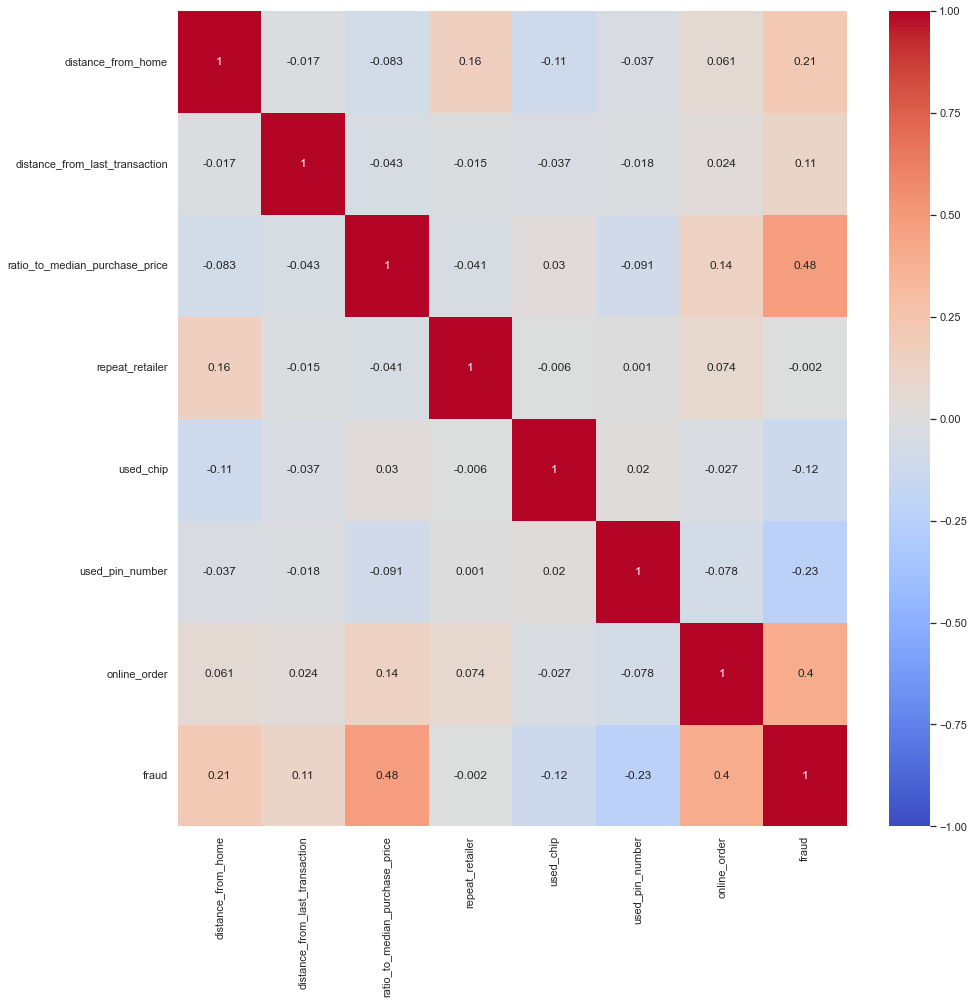

In [118]:
sns.heatmap(df3.corr().round(3), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
sns.set(rc={"figure.figsize":(15,15)})
plt.show()

In [119]:
#Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

feature_columns = ["distance_from_home", "distance_from_last_transaction",
"ratio_to_median_purchase_price", "repeat_retailer", "used_chip", "used_pin_number", "online_order"]

X_smote = df3[feature_columns]
y_smote = df3.fraud

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=39)

## Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_smote, y_train_smote)

y_pred_logreg_smote = logreg.predict(X_test_smote)
print("Accuracy of logistic regression classifier on test set: {:.5f}".format(logreg.score(X_test_smote, y_test_smote)))

Accuracy of logistic regression classifier on test set: 0.94168


In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix_logreg = confusion_matrix(y_test_smote, y_pred_logreg_smote)
confusion_matrix_logreg

array([[170558,  12121],
       [  9168, 173192]], dtype=int64)

Text(84.5, 0.5, 'Reality')

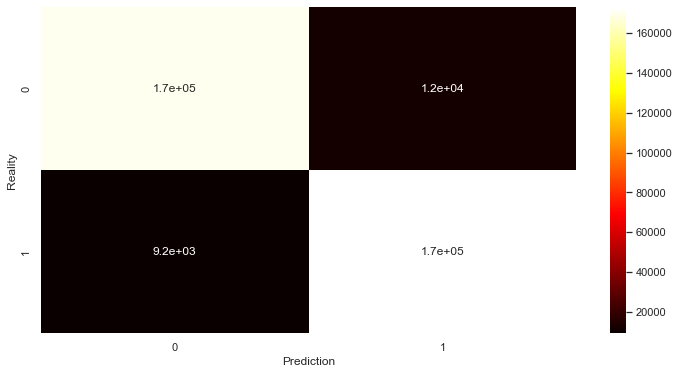

In [122]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_logreg, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test_smote, y_pred_logreg_smote, digits=6))

              precision    recall  f1-score   support

         0.0   0.948989  0.933649  0.941256    182679
         1.0   0.934592  0.949726  0.942098    182360

    accuracy                       0.941680    365039
   macro avg   0.941790  0.941687  0.941677    365039
weighted avg   0.941797  0.941680  0.941677    365039



In [138]:
#Creating pickle file for logistic regression model and saving it to S3 bucket
s3_resource = boto3.resource('s3')
import pickle

bucket='damg-model'
key= 'logisticregression.pkl'

pickle_byte_obj = pickle.dumps(logreg)

s3_resource.Object(bucket,key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'F9XZ4DXS2DGTNWVD',
  'HostId': 'NV2mXhRSCg87IXxlwYQ+p4sbtCuFzdNu21u208k11AQqYhVteud3N3xT1Fggts10OLAJp42100EjZeYt4BiAyA==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'NV2mXhRSCg87IXxlwYQ+p4sbtCuFzdNu21u208k11AQqYhVteud3N3xT1Fggts10OLAJp42100EjZeYt4BiAyA==',
   'x-amz-request-id': 'F9XZ4DXS2DGTNWVD',
   'date': 'Wed, 14 Dec 2022 00:28:59 GMT',
   'etag': '"ad9246b81f2237c1ba7bc33c7e66b352"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"ad9246b81f2237c1ba7bc33c7e66b352"'}

## Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_smote,y_train_smote)

y_pred_dectree_smote = clf.predict(X_test_smote)

print("Accuracy:", metrics.accuracy_score(y_test_smote, y_pred_dectree_smote))

Accuracy: 0.9999753451001125


In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix_decision = confusion_matrix(y_test_smote, y_pred_dectree_smote)
confusion_matrix_decision

array([[182678,      1],
       [     8, 182352]], dtype=int64)

Text(84.5, 0.5, 'Reality')

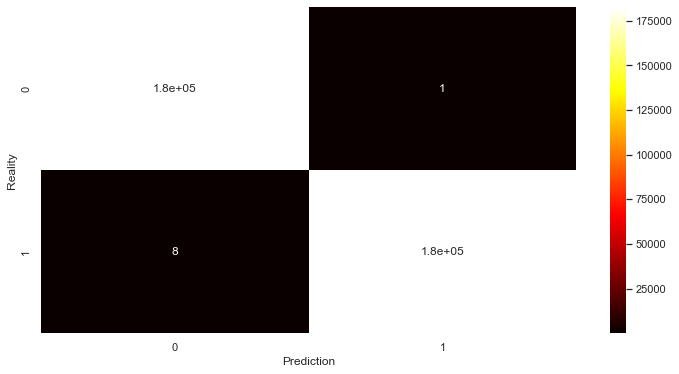

In [126]:
plt.figure(figsize = (12, 6))

sns.heatmap(confusion_matrix_decision, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [127]:
print(classification_report(y_test_smote, y_pred_dectree_smote, digits=6))

              precision    recall  f1-score   support

         0.0   0.999956  0.999995  0.999975    182679
         1.0   0.999995  0.999956  0.999975    182360

    accuracy                       0.999975    365039
   macro avg   0.999975  0.999975  0.999975    365039
weighted avg   0.999975  0.999975  0.999975    365039



In [137]:
#Creating pickle file for decision tree model and saving it to S3 bucket
s3_resource = boto3.resource('s3')
import pickle

bucket='damg-model'
key= 'decisiontree.pkl'

pickle_byte_obj = pickle.dumps(clf)

s3_resource.Object(bucket,key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'FNGAEZ1V5ZA2C9C9',
  'HostId': 'u7luZJaJBH2hF3HQBXYFcJT6w4HdPeSG3RZ/ds6ijFufcU4hMSIKuWOWS2iA/7UVxa/pxM29CZJ9mVx9BROSjQ==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'u7luZJaJBH2hF3HQBXYFcJT6w4HdPeSG3RZ/ds6ijFufcU4hMSIKuWOWS2iA/7UVxa/pxM29CZJ9mVx9BROSjQ==',
   'x-amz-request-id': 'FNGAEZ1V5ZA2C9C9',
   'date': 'Wed, 14 Dec 2022 00:25:43 GMT',
   'etag': '"22171e340e0fe74d115e66d312e14db6"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"22171e340e0fe74d115e66d312e14db6"'}

## KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(3, 8)
train_accuracy_smote = np.empty(len(neighbors))
test_accuracy_smote = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    train_accuracy_smote[i] = knn.score(X_train_smote, y_train_smote)
    test_accuracy_smote[i] = knn.score(X_test_smote, y_test_smote)

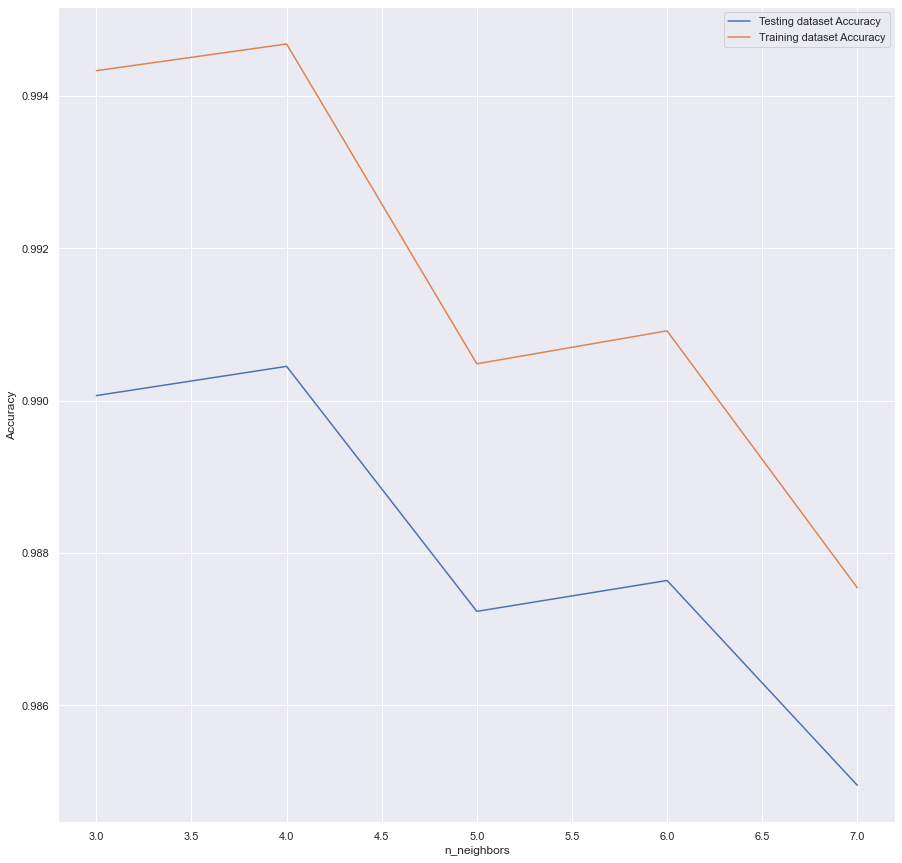

In [129]:
plt.plot(neighbors, test_accuracy_smote, label = "Testing dataset Accuracy")
plt.plot(neighbors, train_accuracy_smote, label = "Training dataset Accuracy")

plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

In [139]:
#Creating pickle file for knn model and saving it to S3 bucket
s3_resource = boto3.resource('s3')
import pickle

bucket='damg-model'
key= 'knn.pkl'

pickle_byte_obj = pickle.dumps(knn)

s3_resource.Object(bucket,key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': '8J24SZEX6EPSJTWK',
  'HostId': 'qjndtXHTDQKLfsy6VBL+LA04k0e0QCCP/LcUOzEBetZVng6JhEJINOjPBDTkF9D2rD/ufsUjiKQ=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'qjndtXHTDQKLfsy6VBL+LA04k0e0QCCP/LcUOzEBetZVng6JhEJINOjPBDTkF9D2rD/ufsUjiKQ=',
   'x-amz-request-id': '8J24SZEX6EPSJTWK',
   'date': 'Wed, 14 Dec 2022 00:30:05 GMT',
   'etag': '"1ba4f1470f950db161a107ab3087ca7e"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"1ba4f1470f950db161a107ab3087ca7e"'}

## Random Forest

In [130]:
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf.fit(X_train_smote, y_train_smote)


RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)

In [131]:
# Printing the Training Score
print("Training score data: ")
print(rf.score(X_train_smote, y_train_smote))

Training score data: 
0.9984124973033685


In [132]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
#     print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

In [133]:
#Testing the model 
#Predicting by X_test
y_pred = rf.predict(X_test_smote)

print(confusion_matrix(y_test_smote, y_pred))
print_results("RF classification", y_test_smote, y_pred)

[[182555    124]
 [   432 181928]]
RF classification
accuracy: 0.9984768750736223
precision: 0.9993188759255597
recall: 0.9976310594428602


In [134]:
X_test_smote.columns


Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')

In [135]:
features = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

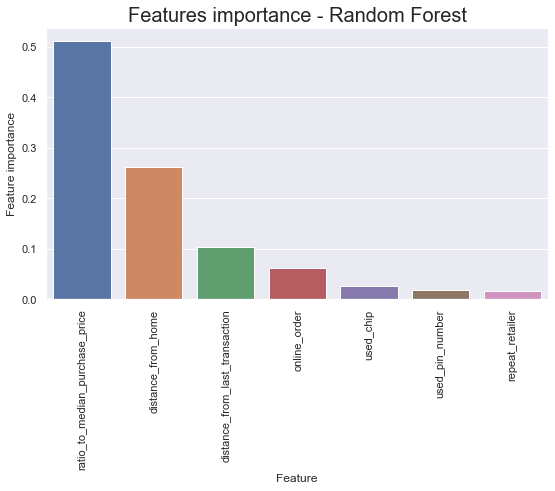

In [136]:
plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

In [140]:
#Creating pickle file for random forest model and saving it to S3 bucket
s3_resource = boto3.resource('s3')
import pickle

bucket='damg-model'
key= 'randomforest.pkl'

pickle_byte_obj = pickle.dumps(rf)

s3_resource.Object(bucket,key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'G614HRY6QHK2Z0V2',
  'HostId': 'SRV3eOKUKsHDm9Zc+r+PVaaxoZfVGDTaeui9Rcr/xCN2SeVSFTrjrUkyBLeesMPfv1MfRGRD8AcaBAqN+0ouUw==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'SRV3eOKUKsHDm9Zc+r+PVaaxoZfVGDTaeui9Rcr/xCN2SeVSFTrjrUkyBLeesMPfv1MfRGRD8AcaBAqN+0ouUw==',
   'x-amz-request-id': 'G614HRY6QHK2Z0V2',
   'date': 'Wed, 14 Dec 2022 00:33:22 GMT',
   'etag': '"4fa59dd28ed51f59c39e83b6f9ce3cb9"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"4fa59dd28ed51f59c39e83b6f9ce3cb9"'}